In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

import arviz as az

In [2]:
az.style.use('arviz-white')

# Using PyMC3 for MCMC sampling

### Chapter 3.3: Introduction to PyMC3

In this example, we use PyMC3 to conduct simple linear regression.

The response is the mass of a T. Rex and the covariate is the age.  The model is:

$$ mass_i\sim\mbox{Normal}(\beta_1+\beta_2age_i,\sigma^2).$$

The priors are:
* $\beta_1,\beta_2\sim\mbox{Normal}(0,1000)$
* $\sigma^2\sim\mbox{InvGamma}(0.1,0.1)$.

In [3]:
## Load T-Rex data
mass = np.array([29.9, 1761, 1807, 2984, 3230, 5040, 5654])
age = np.array([2, 15, 14, 16, 18, 22, 28])

## Define the model

In [4]:
with pm.Model() as model:
    # Priors
    τ = pm.Gamma('τ', 0.1, 10)
    σ = pm.Deterministic('σ', 1/(τ**0.5))
    #σ = pm.HalfNormal('σ', np.std(mass))
    β1 = pm.Normal('β1', 0, 1000)
    β2 = pm.Normal('β2', 0, 1000)
    #likelihood
    mass_y = pm.Normal('mass_y', β1 + β2 * age, σ, observed=mass)

    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β2, β1, τ]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:03<00:00, 1290.07draws/s]


## Summarize the output

In [5]:
az.summary(trace, var_names=['~τ'])

,mean,sd,mcse_mean,mcse_sd,hpd_3%,hpd_97%,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
β1,-665.795,546.229,16.642,11.771,-1590.342,465.074,1078.0,1078.0,1104.0,1400.0,1.0
β2,221.507,31.684,0.950,0.672,160.825,278.028,1112.0,1112.0,1139.0,1654.0,1.0
σ,698.292,264.372,7.124,5.039,338.128,1137.274,1377.0,1377.0,1562.0,1837.0,1.0


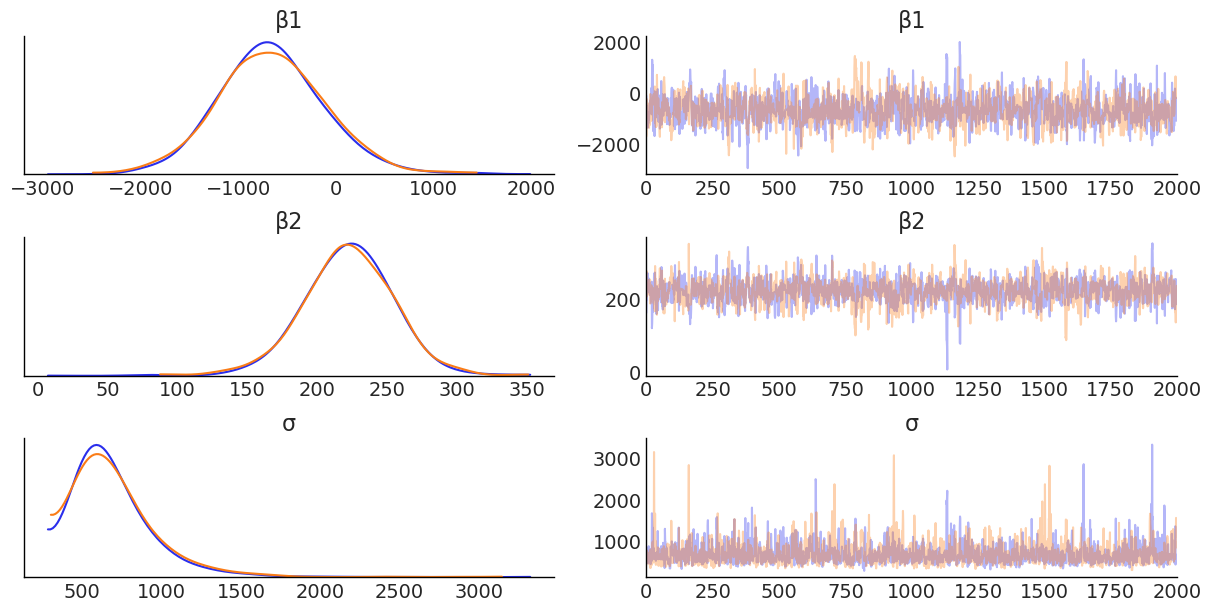

In [6]:
az.plot_trace(trace, var_names=['~τ']);